In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.metrics import roc_auc_score

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [3]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 355ms/step - loss: 20.0915
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 16.0738
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 12.9073
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 10.4108
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 8.4414
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 6.8868
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 5.6586
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 4.6875
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 3.9186
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 3.3089
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 2.8246
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 2.4390
Epoch 13/300
1/1 [==============================] - 0s 

In [4]:
model.predict([10.0])

1/1 [==============================] - 0s 148ms/step


array([[18.84579]], dtype=float32)

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
train_label, test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

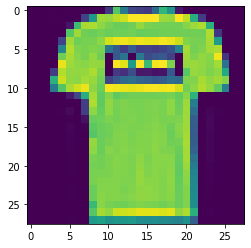

In [12]:
plt.imshow(train_img[1])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

pred = np.argmax(outputs)
print(f'class with highest probability: {pred}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [32]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_img, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5154 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5058 - accuracy: 0.8290
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4844 - accuracy: 0.8364
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4884 - accuracy: 0.8348
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4715 - accuracy: 0.8398


In [33]:
model.evaluate(test_img, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.8267


[0.5166633129119873, 0.82669997215271]

In [37]:
train_img = train_img/255.0
test_img = test_img/255.0

# callback class 실행
callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_img, train_label, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8768
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5474
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4885
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4569
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4367


In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_enc(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training=True